# Data Analysis

In this interactive notebook, we perform analysis on the data that we merged in the [previous notebook](data-merging.ipynb). Here, we aim to perform some analysis on the merged and cleaned data, producing some visualizations and important statistical information to help us answer some of the questions outlined in the [ReadMe](README.md). Analyzed data is stored in pickle format in the [`analyzed_data`](analyzed_data) folder.

----

Let's start by importing the required libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
sns.set_context('talk')

In [2]:
%matplotlib inline

Let us now import our cleaned and merged data from the pickle file stored at [cleaned_data/final_data_merged.pkl](./cleaned_data/final_data_merged.pkl).

In [3]:
final_data = pd.read_pickle('cleaned_data/final_data_merged.pkl')

In [4]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09


We can encapsulate some of the budgeting and revenue information into the return on investment, which we will store in a new field for later use in plotting. Return on investment is the percentage calculated by the difference of the gross revenue and the budget as a proportion of the budget.

In [5]:
final_data['ROI'] = ((final_data['worldwide_gross']
                      - final_data['production_budget'])
                     / final_data['production_budget']) * 100

In [6]:
final_data.to_pickle('analyzed_data/final_data_no_genres.pkl')
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04,-99.836209
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06,-62.746792
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08,106.440860
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07,121.816382
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,666.909239


Somehow, we need to best make use of our genre descriptors. We currently have lists of strings, and it would be nice to produce some sort of histogram using this information. Let's try flattening out our genre descriptions into dummy variables. We have to do a bit of additional processing to make the input suitable for Pandas's `get_dummies` function.

In [7]:
genre_dummies = pd.get_dummies(final_data.genres.apply(pd.Series).stack()).sum(level=0)

In [8]:
genre_dummies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
20,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
54,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
genre_dummies.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

Let's join our original merged data with our genre dummies, for ease of selection.

In [10]:
final_with_genre_dummies = final_data.join(genre_dummies, how='outer')
final_with_genre_dummies.to_pickle('analyzed_data/final_data_with_genres.pkl')

We might also want to take a look at a correlation table, to see if there are any variables that are obviously correlated, and that we can explore later on.

In [11]:
correl_table = final_data.corr()
correl_table

,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ROI
start_year,1.000000,0.048592,-0.043684,0.102462,0.104921,0.115488,0.031860
averagerating,0.048592,1.000000,0.464911,0.209422,0.287181,0.270930,0.026794
numvotes,-0.043684,0.464911,1.000000,0.554988,0.653605,0.642382,0.089905
production_budget,0.102462,0.209422,0.554988,1.000000,0.724452,0.792679,-0.020642
domestic_gross,0.104921,0.287181,0.653605,0.724452,1.000000,0.947475,0.120453
worldwide_gross,0.115488,0.270930,0.642382,0.792679,0.947475,1.000000,0.103602
ROI,0.031860,0.026794,0.089905,-0.020642,0.120453,0.103602,1.000000


For a more visual description of the data, however, we should probably do a bit of plotting. Since we are going to want to plot within genres, we might want to store the number of different possible genres so that we can easily know how many subplots we will need.

In [12]:
num_subplots = len(genre_dummies.columns)
num_subplots

21

Let's also take a look at a rough description of the return on investment as broken down by year of release. We will need to produce a new field in our dataframe to hold this year, but a simple grouping allows us to have detailed statistics using this breakdown.

In [13]:
final_data['release_year'] = final_data.release_date.dt.year

In [14]:
final_data.groupby('release_year').describe()['ROI']

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
2010,175.0,218.498954,596.531301,-100.0,-15.394588,83.243750,232.421949,5817.067733
2011,201.0,190.738618,594.867565,-100.0,-53.183722,80.738155,214.043708,6558.059067
2012,197.0,271.163092,876.672379,-100.0,-49.066667,68.449583,293.627420,10075.949000
2013,197.0,191.269182,422.672506,-100.0,-59.148083,100.703767,251.785447,2942.219367
2014,213.0,177.674962,446.176564,-100.0,-94.246290,54.872124,273.931388,3851.737231
2015,255.0,299.268800,2646.385969,-100.0,-100.000000,-22.189083,188.249074,41556.474000
2016,179.0,244.377970,541.392791,-100.0,-41.230350,95.915130,293.698348,4249.700800
2017,132.0,366.966122,767.769123,-100.0,14.954915,155.018377,385.728292,5479.296120
2018,119.0,305.297444,470.916246,-100.0,5.266511,147.341730,509.658293,2617.924114


Let's consider the ratings distributions within each genre. In particular, we can segment our data using our genre dummy columns generated above, and plot an individual histogram of the average user ratings for this genre of movie.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


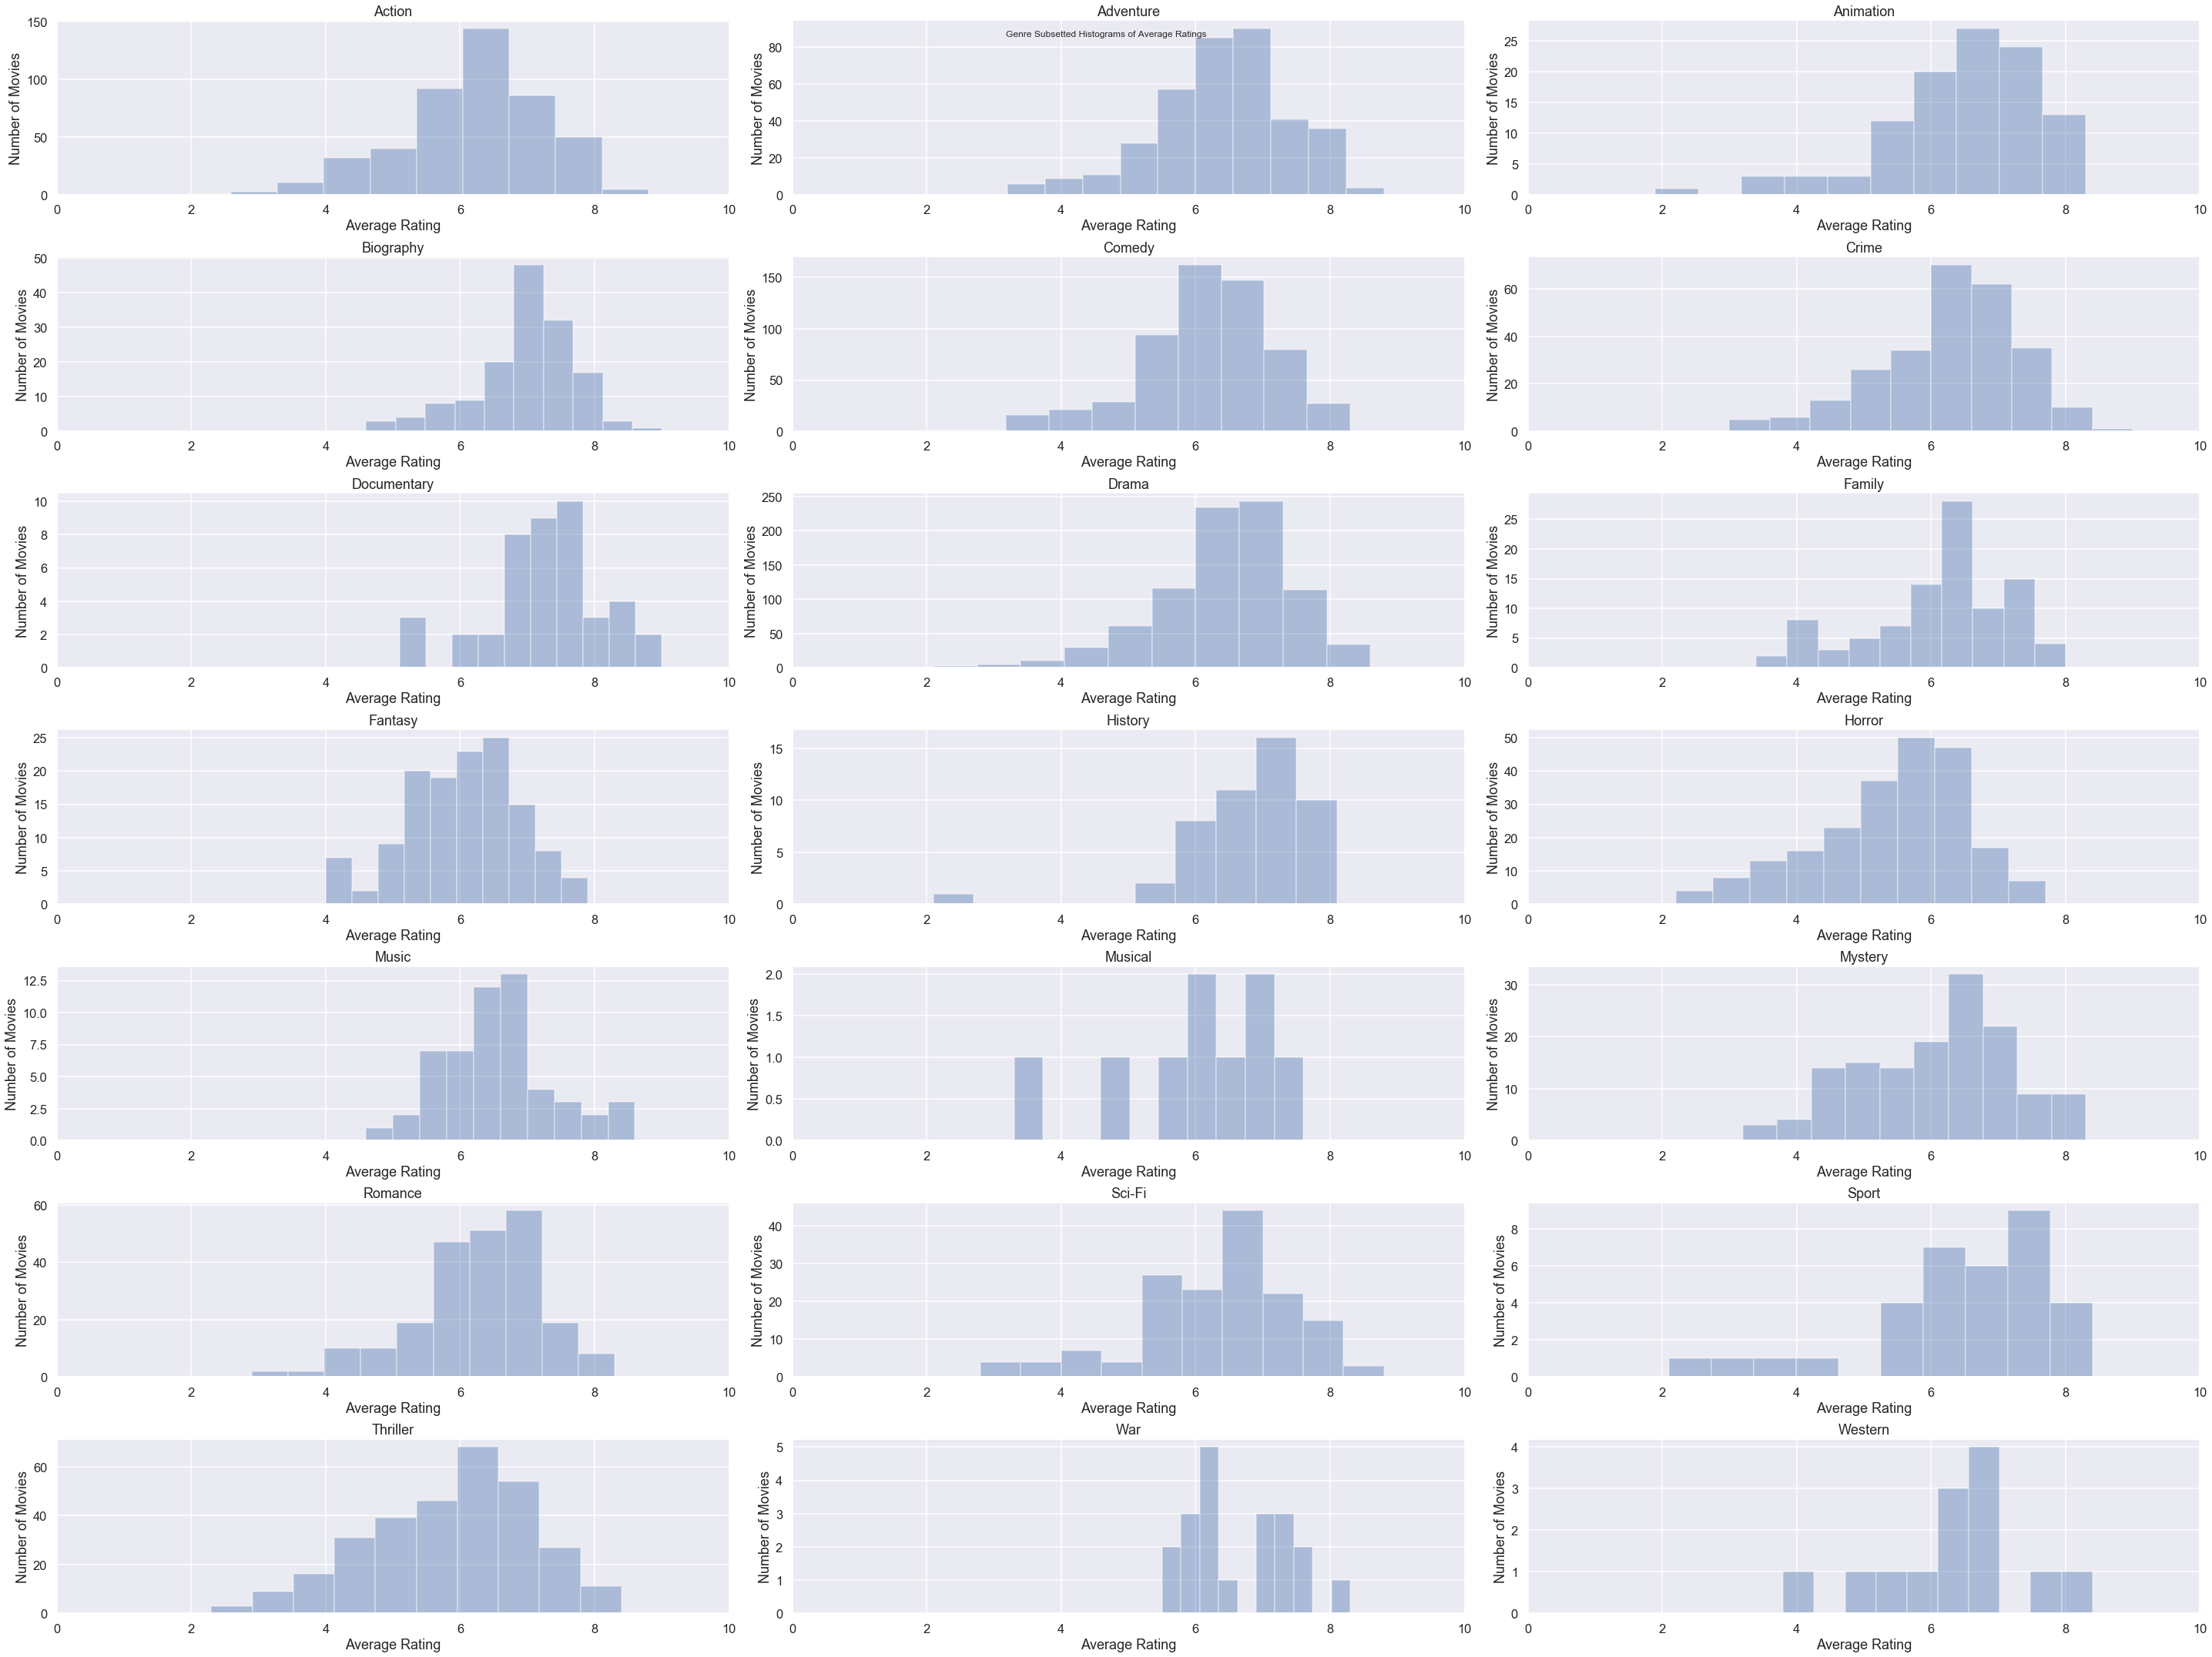

In [15]:
rows = 7
cols = 3
genre_subset_f1, genre_subset_ax1 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax1[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1];
    sns.distplot(cur_subset.averagerating, kde=False, bins=10, ax=cur_ax)
    cur_ax.set_xlim(0,10)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Average Rating')
    cur_ax.set_ylabel('Number of Movies')

genre_subset_f1.suptitle('Genre Subsetted Histograms of Average Ratings')
genre_subset_f1.tight_layout()
plt.savefig('plots/genre-histogram.png', format='png')

This plot is interesting, but not very useful. Perhaps with a larger selection of data, we may be able to draw some trends from this visualization. However, when some categories contain so few samples, it is hard to make any significant conclusions. We might instead want to consider the full aggregation of the return on investment and average ratings by genre.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


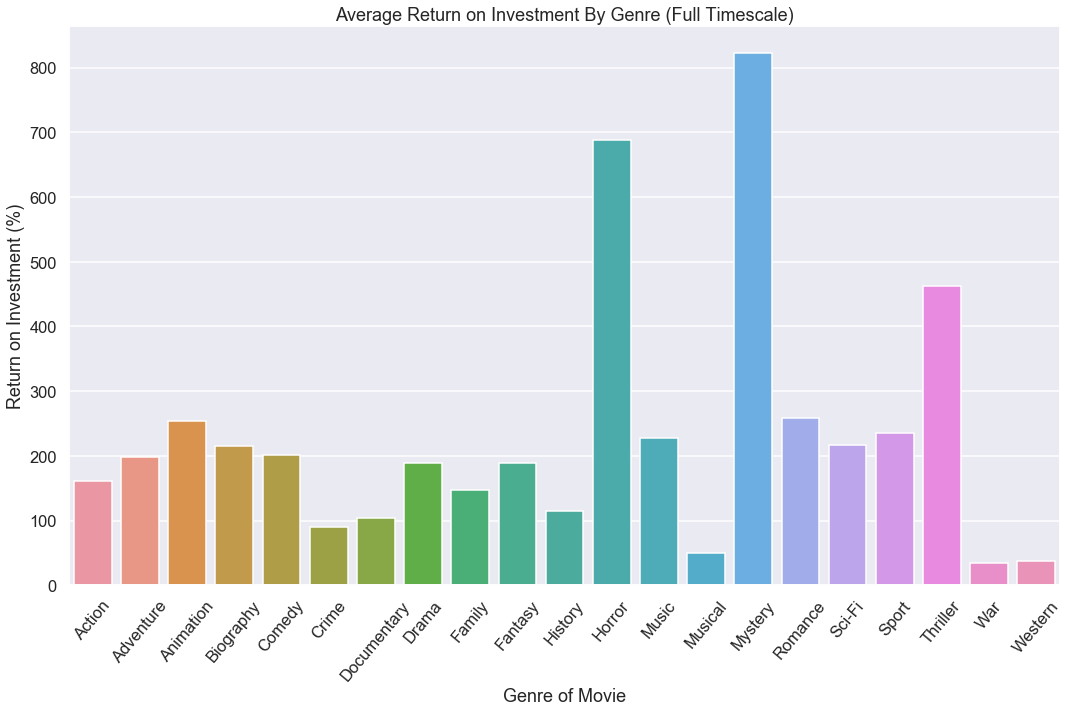

In [16]:
genre_subset_f2, genre_subset_ax2 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
mean_rois = []

for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1];
    mean_rois.append(cur_subset.ROI.mean())

sns.barplot(x=genre_dummies.columns, y=mean_rois, ax=genre_subset_ax2)
genre_subset_ax2.set_title('Average Return on Investment By Genre (Full Timescale)')
genre_subset_ax2.set_xlabel('Genre of Movie')
genre_subset_ax2.set_ylabel('Return on Investment (%)')
genre_subset_ax2.tick_params(axis='x', labelrotation=50.0)
genre_subset_f2.tight_layout()
plt.savefig('plots/average-roi-by-genre.png', format='png')

This plot is rather revealing. In particular, this plot indicates that Horror, Mystery, and Thriller films are generally quite successful at having a high return on investment. We might want to have this information by genre stored for later use, so let's save it as a new dataframe with the appropriate formatting.

In [17]:
mean_roi_by_genre_df = pd.DataFrame(np.asarray(mean_rois), index=genre_dummies.columns, columns =['mean_roi'])

Let's also take a look at the average ratings information as broken down by genre. Because our aim is directed more towards the return on investment, this plot is of lesser significance, however may still provide some interesting results.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


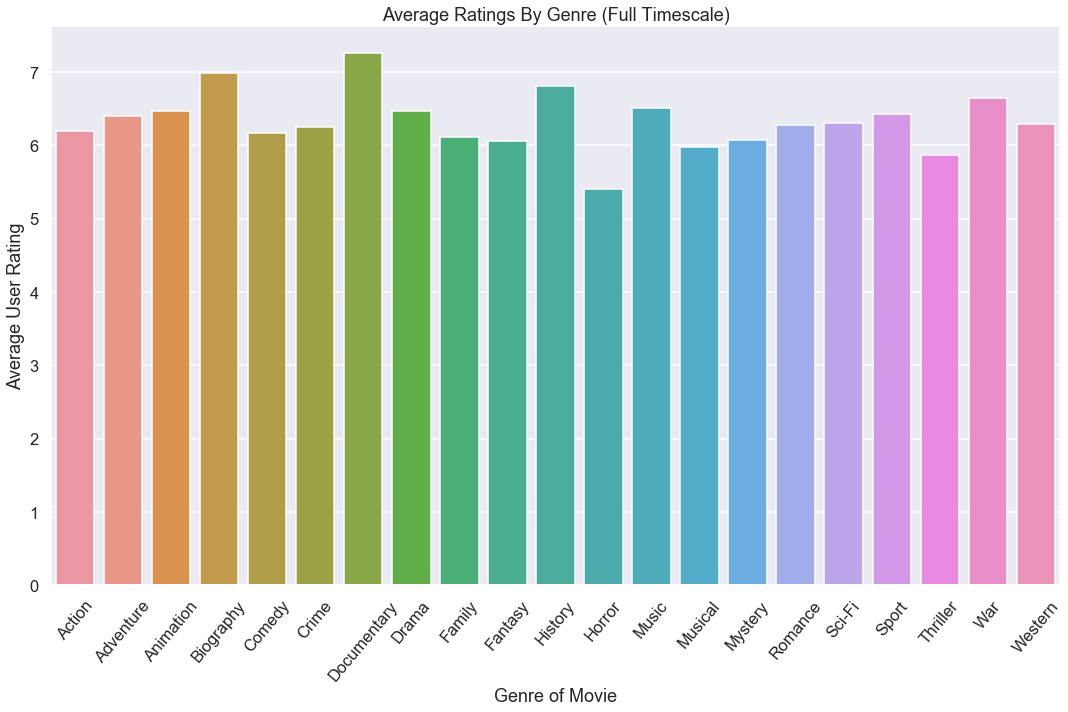

In [18]:
genre_subset_f3, genre_subset_ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
mean_ratings = []

for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1];
    mean_ratings.append(cur_subset.averagerating.mean())

sns.barplot(x=genre_dummies.columns, y=mean_ratings, ax=genre_subset_ax3)
genre_subset_ax3.set_title('Average Ratings By Genre (Full Timescale)')
genre_subset_ax3.set_xlabel('Genre of Movie')
genre_subset_ax3.set_ylabel('Average User Rating')
genre_subset_ax3.tick_params(axis='x', labelrotation=50.0)
genre_subset_f3.tight_layout()
plt.savefig('plots/average-ratings-by-genre.png', format='png')

Evidently not, as each of the genres is held within a relatively small window of possible average user ratings when considered in the aggregation of all the movies.

----
As such, it might behoove us to consider the effect of particular crews (directors, actors, casts, etc) on the return on investment. We may be able to identify some big name directors that have a history of high returns on the investments into their films.

In [19]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,release_year
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04,-99.836209,2012
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06,-62.746792,2013
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08,106.440860,2013
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07,121.816382,2014
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,666.909239,2015


In this case, we want to explore the creators of the top 10 movies within each of the top 3 genres by mean return on investment. As was demonstrated in an earlier plot, but is further reinforced by examination of our saved dataframe, Horror, Thriller, and Mystery are the top three genres by the average return on investment.

In [20]:
mean_roi_by_genre_df

,mean_roi
Action,161.202457
Adventure,198.406256
Animation,254.596581
Biography,214.752888
Comedy,201.529246
Crime,89.614377
Documentary,103.666061
Drama,189.228176
Family,146.959619
Fantasy,188.239827


Let's sort this dataframe by the `mean_roi` field, and save it into the [`cleaned_data`](cleaned_data) folder for later use.

In [21]:
mean_roi_by_genre_df.sort_values(by='mean_roi', axis='index', inplace=True, ascending=False)
mean_roi_by_genre_df.to_pickle('analyzed_data/mean_roi_by_genre.pkl')

In [22]:
mean_roi_by_genre_df

,mean_roi
Mystery,822.515438
Horror,687.538916
Thriller,462.891669
Romance,258.250330
Animation,254.596581
Sport,235.177684
Music,227.116495
Sci-Fi,216.295779
Biography,214.752888
Comedy,201.529246


As we can see, Mystery, Horror, and Thriller films all seem to have the most potential for a high return on investment. In order to explore futher, we are going to consider the top movies within these categories by return on investment, and find some suitable talent for future films.

----

In particular, we will consider the top ten movies within each genre, and from this we will consider the proportions of total gross income that are assigned to the various directors. Our first step is to subset our data into the top 10 movies by ROI for each selected genre, including action for an interesting comparison to the top 3.

In [23]:
horror = final_with_genre_dummies[final_with_genre_dummies.Horror == 1]
cols_to_drop = genre_dummies.columns.to_list()
cols_to_drop.remove('Horror')
horror_drop = horror.drop(columns = cols_to_drop)
horror_drop.sort_values('ROI', ascending=False, inplace=True)
horror_top10 = horror_drop.head(10)

In [24]:
horror_top10.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Horror
35625,tt2309260,The Gallows,The Gallows,2015,"[Horror, Mystery, Thriller]","[nm4000389, nm3951039]","[nm3951039, nm4000389]",4.2,17763.0,2015-07-10,100000.0,22764410.0,41656474.0,41556.474000,1
9487,tt1560985,The Devil Inside,The Devil Inside,2012,[Horror],[nm0068587],"[nm0068587, nm1834343]",4.2,33522.0,2012-01-06,1000000.0,53262945.0,101759490.0,10075.949000,1
10236,tt1591095,Insidious,Insidious,2010,"[Horror, Mystery, Thriller]",[nm1490123],[nm1191481],6.9,254197.0,2011-04-01,1500000.0,54009150.0,99870886.0,6558.059067,1
64866,tt3713166,Unfriended,Unfriended,2014,"[Horror, Mystery, Thriller]",[nm0300174],[nm4532532],5.6,62043.0,2015-04-17,1000000.0,32789645.0,64364198.0,6336.419800,1
8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,[Horror],[nm0931095],"[nm0675219, nm0484907, nm2317082, nm2305431]",5.7,93122.0,2010-10-20,3000000.0,84752907.0,177512032.0,5817.067733,1


In [25]:
mystery = final_with_genre_dummies[final_with_genre_dummies.Mystery == 1]
cols_to_drop = genre_dummies.columns.to_list()
cols_to_drop.remove('Mystery')
mystery_drop = mystery.drop(columns = cols_to_drop)
mystery_drop.sort_values('ROI', ascending=False, inplace=True)
mystery_top10 = mystery_drop.head(10)

In [26]:
mystery_top10.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Mystery
35625,tt2309260,The Gallows,The Gallows,2015,"[Horror, Mystery, Thriller]","[nm4000389, nm3951039]","[nm3951039, nm4000389]",4.2,17763.0,2015-07-10,100000.0,22764410.0,41656474.0,41556.474000,1
10236,tt1591095,Insidious,Insidious,2010,"[Horror, Mystery, Thriller]",[nm1490123],[nm1191481],6.9,254197.0,2011-04-01,1500000.0,54009150.0,99870886.0,6558.059067,1
64866,tt3713166,Unfriended,Unfriended,2014,"[Horror, Mystery, Thriller]",[nm0300174],[nm4532532],5.6,62043.0,2015-04-17,1000000.0,32789645.0,64364198.0,6336.419800,1
87039,tt5052448,Get Out,Get Out,2017,"[Horror, Mystery, Thriller]",[nm1443502],[nm1443502],7.7,400474.0,2017-02-24,5000000.0,176040665.0,255367951.0,5007.359020,1
24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,"[Horror, Mystery, Thriller]",[nm0662086],"[nm2305431, nm1139317, nm0886749]",5.0,60304.0,2012-05-25,1000000.0,18119640.0,42411721.0,4141.172100,1


In [27]:
thriller = final_with_genre_dummies[final_with_genre_dummies.Thriller == 1]
cols_to_drop = genre_dummies.columns.to_list()
cols_to_drop.remove('Thriller')
thriller_drop = thriller.drop(columns = cols_to_drop)
thriller_drop.sort_values('ROI', ascending=False, inplace=True)
thriller_top10 = thriller_drop.head(10)

In [28]:
thriller_top10.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Thriller
35625,tt2309260,The Gallows,The Gallows,2015,"[Horror, Mystery, Thriller]","[nm4000389, nm3951039]","[nm3951039, nm4000389]",4.2,17763.0,2015-07-10,100000.0,22764410.0,41656474.0,41556.474000,1
10236,tt1591095,Insidious,Insidious,2010,"[Horror, Mystery, Thriller]",[nm1490123],[nm1191481],6.9,254197.0,2011-04-01,1500000.0,54009150.0,99870886.0,6558.059067,1
64866,tt3713166,Unfriended,Unfriended,2014,"[Horror, Mystery, Thriller]",[nm0300174],[nm4532532],5.6,62043.0,2015-04-17,1000000.0,32789645.0,64364198.0,6336.419800,1
87039,tt5052448,Get Out,Get Out,2017,"[Horror, Mystery, Thriller]",[nm1443502],[nm1443502],7.7,400474.0,2017-02-24,5000000.0,176040665.0,255367951.0,5007.359020,1
24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,"[Horror, Mystery, Thriller]",[nm0662086],"[nm2305431, nm1139317, nm0886749]",5.0,60304.0,2012-05-25,1000000.0,18119640.0,42411721.0,4141.172100,1


In [29]:
action = final_with_genre_dummies[final_with_genre_dummies.Action == 1]
cols_to_drop = genre_dummies.columns.to_list()
cols_to_drop.remove('Action')
action_drop = action.drop(columns = cols_to_drop)
action_drop.sort_values('ROI', ascending=False, inplace=True)
action_top10 = action_drop.head(10)

In [30]:
action_top10.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Action
87402,tt5074352,Dangal,Dangal,2016,"[Action, Biography, Drama]",[nm4318159],"[nm6328029, nm6328031, nm6328030, nm8661566, n...",8.5,123638.0,2016-12-21,9500000.0,12391761.0,294654618.0,3001.627558,1
20344,tt1853739,You're Next,You're Next,2011,"[Action, Comedy, Horror]",[nm1417392],[nm1440023],6.6,79451.0,2013-08-23,1000000.0,18494006.0,26887177.0,2588.717700,1
79713,tt4573516,Sleight,Sleight,2016,"[Action, Drama, Sci-Fi]",[nm2300570],"[nm2300570, nm2242713]",5.9,7074.0,2017-04-28,250000.0,3930990.0,3934450.0,1473.780000,1
129179,tt7961060,Dragon Ball Super: Broly,Doragon bôru chô: Burorî,2018,"[Action, Adventure, Animation]",[nm0619110],[nm0868066],8.0,16465.0,2019-01-16,8500000.0,30376755.0,122747755.0,1344.091235,1
7543,tt1431045,Deadpool,Deadpool,2016,"[Action, Adventure, Comedy]",[nm1783265],"[nm1014201, nm1116660]",8.0,820847.0,2016-02-12,58000000.0,363070709.0,801025593.0,1281.078609,1


Now that we have each of the top 10 movies for the Horror, Mystery, and Thriller genres, we will now consider the breakdown of the worldwide gross revenue by directorship. We simply need to loop over the possible directors and deduce how much of each movie's gross can be attributed to them. This is a relatively complicated piece of code which we will need to use repeatedly, and so we'll write a custom function to handle creating a new dataframe populated by the possible directors within a genre and their respective proportion of the total gross revenue of that dataframe.

In [31]:
def get_director_gross_percentage(df):
    directors = pd.get_dummies(df.directors.apply(pd.Series).stack()).sum(level=0).columns
    
    total_ww_gross = df.sum()['worldwide_gross']
    total_ww_gross_vec = np.asarray([total_ww_gross for i in range(len(directors))]) # for later computations
    
    zeros = [0 for i in range(len(directors))]
    dir_dict = dict(zip(directors.to_list(), zeros)) # to easily store how much gross each director generates
    
    df_with_gpd = df
    # each movie has gross/number of directors gross per director, this is used for proportion calculation
    df_with_gpd['gpd'] = df_with_gpd.apply(lambda r: (r['worldwide_gross']/len(r['directors'])), axis='columns')
    
    for d in directors:
        for index, row in df_with_gpd.iterrows():
            if d in row.directors:
                dir_dict[d] += row['gpd']
                
    proportion_vec = (np.asarray(list(dir_dict.values()))/total_ww_gross_vec) * 100
    
    proportion_df = pd.DataFrame(proportion_vec, index=dir_dict.keys(), columns=['ww_gross_percent'])
    return proportion_df

Now that we have our function that produces the gross proportion attributed to each director, and returns the result as a pandas dataframe, we can use this function to visualize this information for each of the genres. In our case, we will focus on the top 3 genres by return on investment, though we will also provide a similar visualization for action movies, for the sake of comparison.

In [32]:
horror_director_proportions = get_director_gross_percentage(horror_top10)
horror_director_proportions

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ww_gross_percent
nm0068587,7.726546
nm0300174,4.887140
nm0502954,19.503470
nm0662086,3.220300
nm0821844,5.327661
nm0931095,13.478397
nm1160962,7.860214
nm1413364,7.860214
nm1443502,19.389957
nm1490123,7.583145


In [33]:
mystery_director_proportions = get_director_gross_percentage(mystery_top10)
mystery_director_proportions

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ww_gross_percent
nm0220600,6.630324
nm0300174,4.864541
nm0484907,9.448070
nm0502954,19.413278
nm0662086,3.205408
nm1160962,13.220841
nm1413364,13.220841
nm1443502,19.300291
nm1490123,7.548078
nm3951039,1.574164


In [34]:
thriller_director_proportions = get_director_gross_percentage(thriller_top10)
thriller_director_proportions

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ww_gross_percent
nm0218621,7.500946
nm0220600,7.210104
nm0300174,5.289914
nm0502954,21.110848
nm0662086,3.485701
nm0821844,5.766740
nm1160962,8.508014
nm1413364,8.508014
nm1443502,20.987980
nm1490123,8.208110


In [35]:
action_director_proportions = get_director_gross_percentage(action_top10)
action_director_proportions

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ww_gross_percent
nm0000108,15.059900
nm0218621,7.572601
nm0440458,31.748566
nm0619110,4.040519
nm1417392,0.885052
nm1783265,26.367563
nm2300570,0.129511
nm2618764,4.497067
nm4318159,9.699221


Let's add the names for each of the directors to their associated dataframes. We will need the cleaned version of the IMDB name basics for this task, as it provides a cross reference of the IMDB name ID constants which are present in the final data. Like the other cleaned data, this file is stored at [`cleaned_data/imdb_name_basics.pkl`](cleaned_data/imdb_name_basics.pkl) in pickle format. We will set the index as needed, and use this dataset to populate the name field for each of our movie director gross breakdown by genre dataframes.

In [36]:
imdb_name_basics = pd.read_pickle('cleaned_data/imdb_name_basics.pkl')
imdb_name_basics.set_index(keys='imdb_nameid', inplace=True)

In [37]:
imdb_name_basics.head()

,primary_name
imdb_nameid,
nm0061671,Mary Ellen Bauder
nm0061865,Joseph Bauer
nm0062070,Bruce Baum
nm0062195,Axel Baumann
nm0062798,Pete Baxter


In [38]:
horror_director_proportions['name'] = horror_director_proportions.index.map(lambda n: imdb_name_basics.loc[n, 'primary_name'])

In [39]:
horror_director_proportions

,ww_gross_percent,name
nm0068587,7.726546,William Brent Bell
nm0300174,4.887140,Levan Gabriadze
nm0502954,19.503470,John R. Leonetti
nm0662086,3.220300,Bradley Parker
nm0821844,5.327661,Daniel Stamm
nm0931095,13.478397,Tod Williams
nm1160962,7.860214,Henry Joost
nm1413364,7.860214,Ariel Schulman
nm1443502,19.389957,Jordan Peele
nm1490123,7.583145,James Wan


In [40]:
mystery_director_proportions['name'] = mystery_director_proportions.index.map(lambda n: imdb_name_basics.loc[n, 'primary_name'])

In [41]:
mystery_director_proportions

,ww_gross_percent,name
nm0220600,6.630324,Scott Derrickson
nm0300174,4.864541,Levan Gabriadze
nm0484907,9.448070,Christopher Landon
nm0502954,19.413278,John R. Leonetti
nm0662086,3.205408,Bradley Parker
nm1160962,13.220841,Henry Joost
nm1413364,13.220841,Ariel Schulman
nm1443502,19.300291,Jordan Peele
nm1490123,7.548078,James Wan
nm3951039,1.574164,Chris Lofing


In [42]:
thriller_director_proportions['name'] = thriller_director_proportions.index.map(lambda n: imdb_name_basics.loc[n, 'primary_name'])

In [43]:
thriller_director_proportions

,ww_gross_percent,name
nm0218621,7.500946,James DeMonaco
nm0220600,7.210104,Scott Derrickson
nm0300174,5.289914,Levan Gabriadze
nm0502954,21.110848,John R. Leonetti
nm0662086,3.485701,Bradley Parker
nm0821844,5.766740,Daniel Stamm
nm1160962,8.508014,Henry Joost
nm1413364,8.508014,Ariel Schulman
nm1443502,20.987980,Jordan Peele
nm1490123,8.208110,James Wan


In [44]:
action_director_proportions['name'] = action_director_proportions.index.map(lambda n: imdb_name_basics.loc[n, 'primary_name'])

In [45]:
action_director_proportions

,ww_gross_percent,name
nm0000108,15.059900,Luc Besson
nm0218621,7.572601,James DeMonaco
nm0440458,31.748566,Jake Kasdan
nm0619110,4.040519,Tatsuya Nagamine
nm1417392,0.885052,Adam Wingard
nm1783265,26.367563,Tim Miller
nm2300570,0.129511,J.D. Dillard
nm2618764,4.497067,Gerard McMurray
nm4318159,9.699221,Nitesh Tiwari


Now, with this information, we can make some bar plots that represent the proportion of total worldwide gross of the top 10 movies of each selected genre by director.

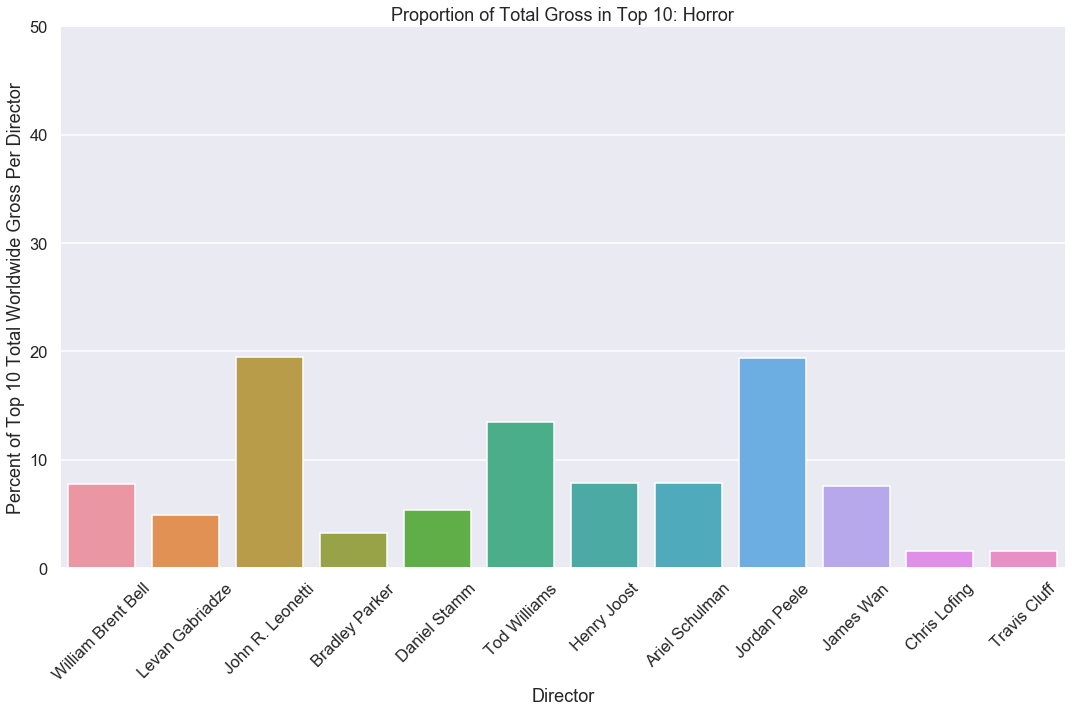

In [46]:
h10_fig, h10_ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=horror_director_proportions.name, y=horror_director_proportions.ww_gross_percent)
h10_ax.set_ylim(0, 50)
h10_ax.tick_params(axis='x', labelrotation=45.0)
h10_ax.set_title('Proportion of Total Gross in Top 10: Horror')
h10_ax.set_ylabel('Percent of Top 10 Total Worldwide Gross Per Director')
h10_ax.set_xlabel('Director')
plt.tight_layout()
plt.savefig('plots/horror-top10-gross.png', format='png')

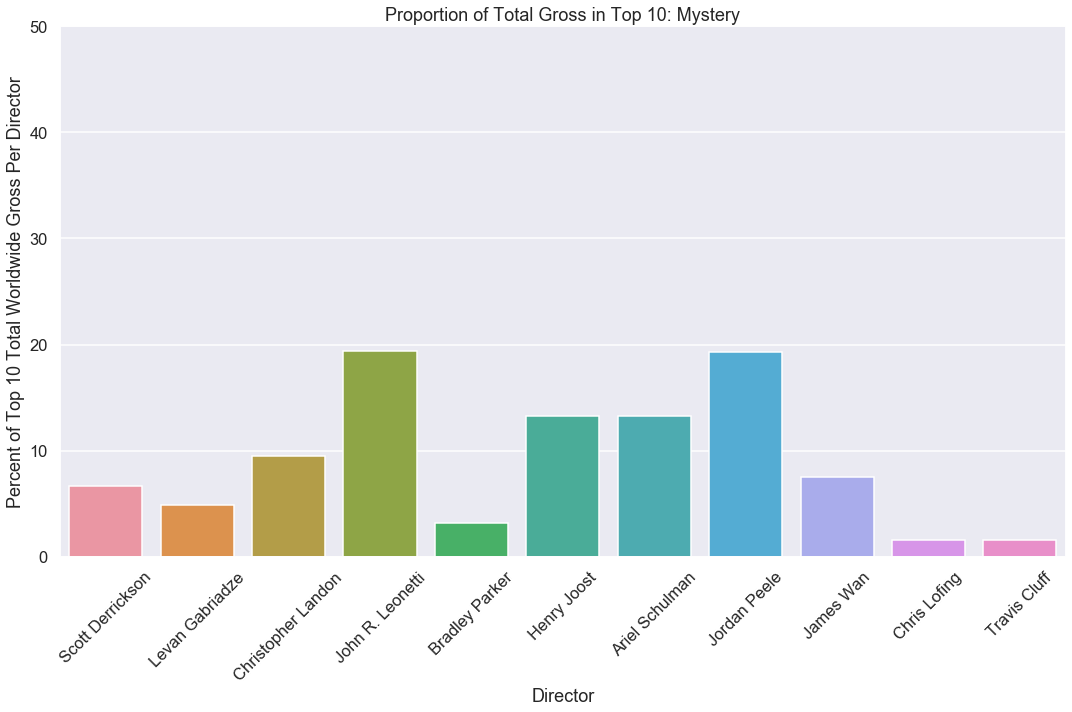

In [47]:
m10_fig, m10_ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=mystery_director_proportions.name, y=mystery_director_proportions.ww_gross_percent)
m10_ax.set_ylim(0, 50)
m10_ax.tick_params(axis='x', labelrotation=45.0)
m10_ax.set_title('Proportion of Total Gross in Top 10: Mystery')
m10_ax.set_ylabel('Percent of Top 10 Total Worldwide Gross Per Director')
m10_ax.set_xlabel('Director')
plt.tight_layout()
plt.savefig('plots/mystery-top10-gross.png', format='png')

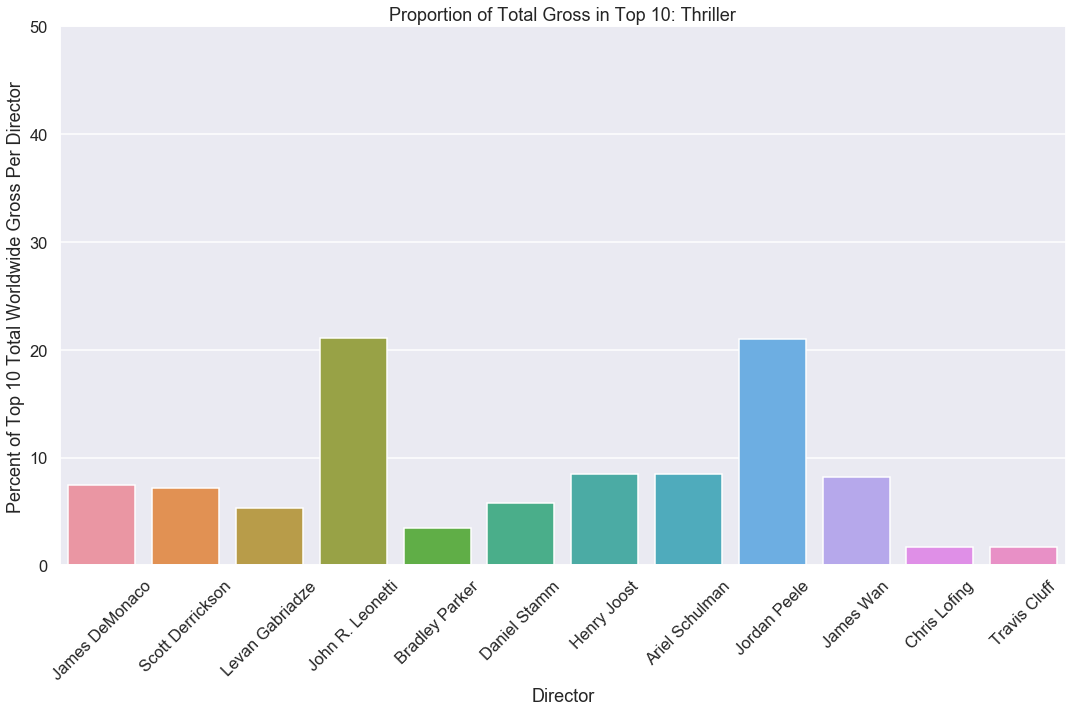

In [48]:
t10_fig, t10_ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=thriller_director_proportions.name, y=thriller_director_proportions.ww_gross_percent)
t10_ax.set_ylim(0, 50)
t10_ax.tick_params(axis='x', labelrotation=45.0)
t10_ax.set_title('Proportion of Total Gross in Top 10: Thriller')
t10_ax.set_ylabel('Percent of Top 10 Total Worldwide Gross Per Director')
t10_ax.set_xlabel('Director')
plt.tight_layout()
plt.savefig('plots/thriller-top10-gross.png', format='png')

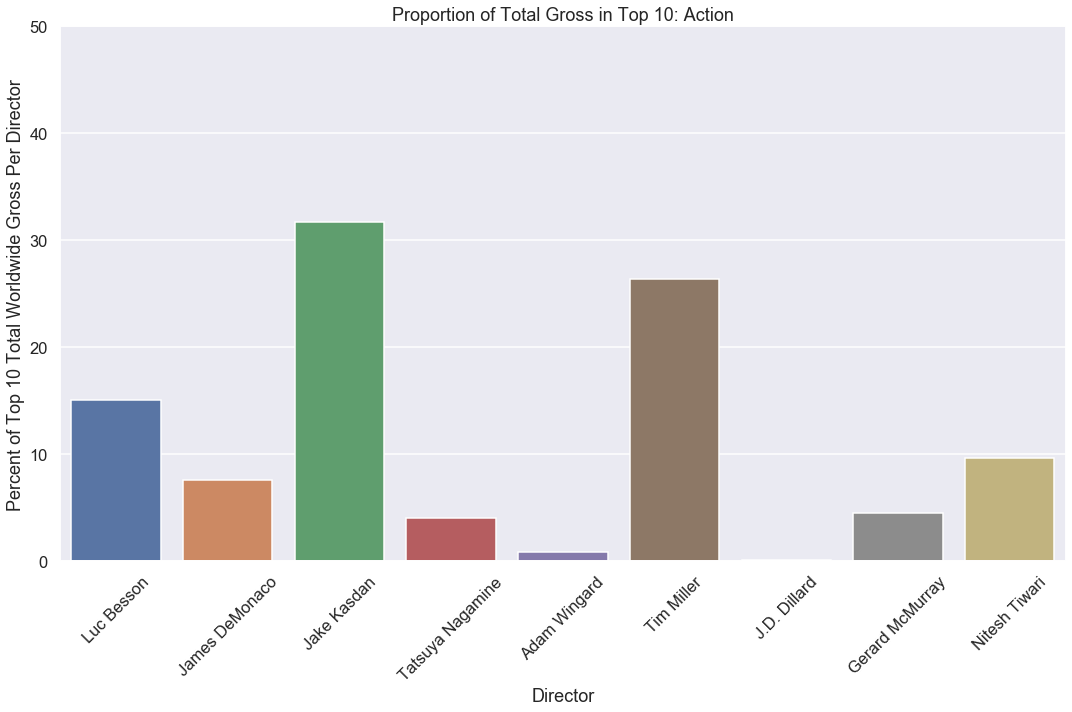

In [49]:
a10_fig, a10_ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=action_director_proportions.name, y=action_director_proportions.ww_gross_percent)
a10_ax.set_ylim(0, 50)
a10_ax.tick_params(axis='x', labelrotation=45.0)
a10_ax.set_title('Proportion of Total Gross in Top 10: Action')
a10_ax.set_ylabel('Percent of Top 10 Total Worldwide Gross Per Director')
a10_ax.set_xlabel('Director')
plt.tight_layout()
plt.savefig('plots/action-top10-gross.png', format='png')

----
For conclusions and recommendations with visualizations, please head to the [next notebook](visualizations-and-conclusions.ipynb).